# IMDB INDIAN MOVIES RATING PREDICTION 

## Define the Problem  
### Build a model that predicts the rating of a movie based on features like genre, director, and actors.

### AUTHOR: JAIMINKUMAR

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from sklearn import datasets, model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats

## DATA COLLECTION

In [2]:
df = pd.read_csv(r'F:\\DATA SCIENCE 2023\\CodSoft\\Jaimin\\TASK 2 - IMDB Movie Prediction\\IMDb Movies India.csv', encoding='unicode_escape')

## DATA CLEANING

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
# Remove empty rows
df.dropna(how='all', inplace=True)

# Display the head of the dataframe after removing empty rows
# df.head()

#### FOR YEAR COLUMN

In [6]:
# Remove '-' and '()' from the Year column
df['Year'] = df['Year'].str.replace('-', '').str.replace('(', '').str.replace(')', '')

In [7]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
year_mean = df['Year'].mean()
df['Year'].fillna(year_mean, inplace=True)
df['Year'] = df['Year'].astype(int)

In [8]:
print(df['Year'].dtype)

int32


#### FOR DURATION COLUMN

In [9]:
# Check the unique values in the 'Duration' column
unique_durations = df['Duration'].unique()
unique_durations

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [10]:
# Remove the 'min' suffix and convert the column to numeric, setting errors='coerce' to handle any non-numeric values
# This will convert non-numeric values to NaN
# Then, we can decide how to handle NaN values after

df['Duration'] = df['Duration'].str.replace(' min', '')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Check for NaN values and their count
nan_count = df['Duration'].isna().sum()

# Display the count of NaN values and the head of the dataframe to confirm the changes
print('Count of NaN values in Duration column:', nan_count)
df.head()

Count of NaN values in Duration column: 8269


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
# Fill the NaN values in the 'Duration' column with the mean duration
mean_duration = df['Duration'].mean()
df['Duration'] = df['Duration'].fillna(mean_duration)
df['Duration'] = df['Duration'].astype(int)

#### FOR GENRE COLUMN

In [12]:
# Remove empty values in the 'Genre' column
# Drop rows where 'Genre' is NaN
filtered_data = df.dropna(subset=['Genre'],inplace=True)
filtered_data

#### FOR RATING COLUMN

In [13]:
# Fill the NaN values in the 'Rating' column with the mean rating
mean_rating = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(mean_rating)

#### FOR VOTES

In [14]:
df['Votes'] = df['Votes'].str.replace(',', '')

In [15]:
# Remove commas and handle 'M' values
df['Votes'] = df['Votes'].replace('[\$,]', '', regex=True).replace('[mM]', 'e6', regex=True).astype(float)

In [16]:
# Fill the NaN valuvotesthe 'Rating' column with the mean rating
mean_votes = df['Votes'].mean()
df['Votes'] = df['Votes'].fillna(mean_rating)

#### FOR DIRECTOR COLUMN

In [17]:
df.dropna(subset=['Director'],inplace=True)

#### FOR ACTOR'S COLUMN

In [18]:
df.dropna(subset=['Actor 1'],inplace=True)
df.dropna(subset=['Actor 2'],inplace=True)
df.dropna(subset=['Actor 3'],inplace=True)

In [19]:
df=df.drop_duplicates(subset=['Name'])

In [20]:
df.shape

(10445, 10)

In [21]:
df=df.drop_duplicates(subset=['Actor 1'])

In [22]:
df.shape

(3764, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3764 entries, 0 to 15489
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      3764 non-null   object 
 1   Year      3764 non-null   int32  
 2   Duration  3764 non-null   int32  
 3   Genre     3764 non-null   object 
 4   Rating    3764 non-null   float64
 5   Votes     3764 non-null   float64
 6   Director  3764 non-null   object 
 7   Actor 1   3764 non-null   object 
 8   Actor 2   3764 non-null   object 
 9   Actor 3   3764 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 294.1+ KB


### Data Cleaning is Done...

In [24]:
df.to_csv('imdb_lastwala.csv', index=False)

In [25]:
df.reset_index()

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,,1987,128,Drama,5.839568,5.839568,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2,#Homecoming,2021,90,"Drama, Musical",5.839568,5.839568,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,3,#Yaaram,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,4,...And Once Again,2010,105,Drama,5.839568,5.839568,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...,...
3759,15479,Zindagi Tumse,2019,120,Family,6.000000,13.000000,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
3760,15482,Zindagi Zindabad,2000,140,Drama,5.700000,7.000000,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
3761,15484,Zinga,2021,128,"Adventure, Fantasy, Sci-Fi",5.839568,5.839568,Jaishankar Chigurula,Sri Ram,Devan Sanjeev,Kasu Naveen Kumar
3762,15487,Zokkomon,2011,109,"Action, Adventure, Family",4.000000,351.000000,Satyajit Bhatkal,Darsheel Safary,Anupam Kher,Manjari Fadnnis


# EXPLORATORY DATA ANALYSIS

In [26]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987,128,Drama,5.839568,5.839568,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",5.839568,5.839568,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,5.839568,5.839568,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [27]:
df.describe()

,Year,Duration,Rating,Votes
count,3764.000000,3764.000000,3764.000000,3.764000e+03
mean,1999.044899,122.322529,5.846436,2.340610e+03
std,21.359130,21.200876,1.111705,8.511150e+04
min,1917.000000,21.000000,1.400000,5.000000e+00
25%,1987.000000,115.000000,5.800000,5.839568e+00
50%,2006.000000,128.000000,5.839568,7.000000e+00
75%,2016.000000,128.000000,6.200000,5.300000e+01
max,2022.000000,300.000000,10.000000,5.160000e+06


In [28]:
df.shape

(3764, 10)

# DATA VISUALIZATION

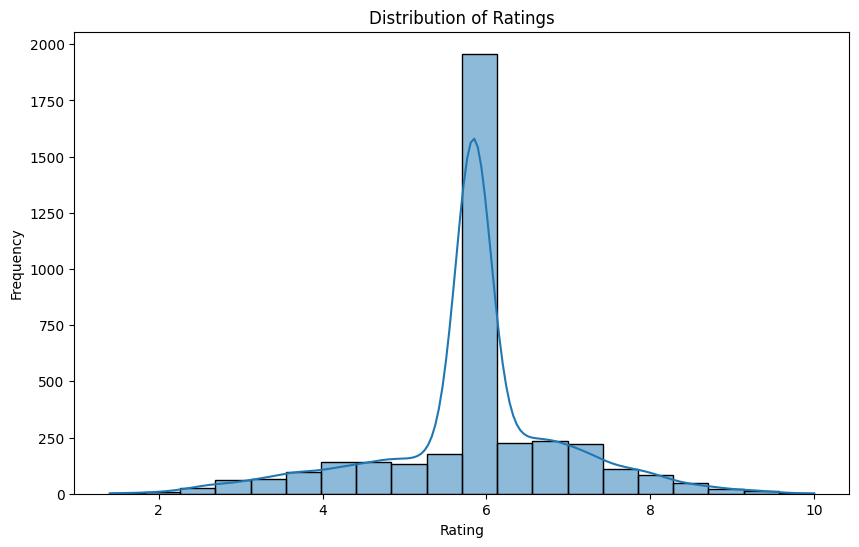

In [29]:
# Histogram for 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### The distribution of ratings is skewed towards the higher end, indicating that there are more movies with higher ratings than lower ratings in the dataset..

### There is a noticeable peak around the rating of 6, suggesting a large number of movies received a rating in this region.

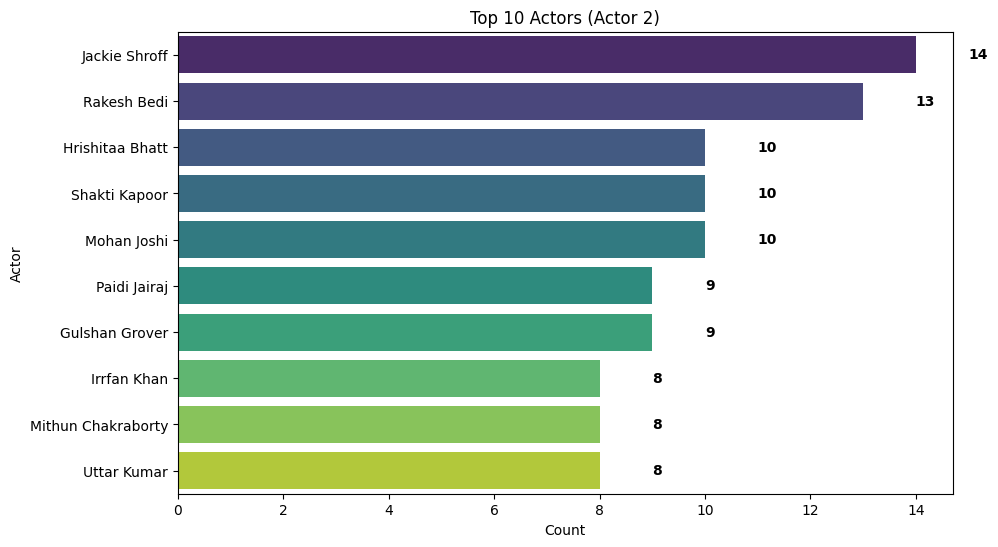

In [30]:
# Assuming df is your DataFrame and 'Actor 1' is a column in the DataFrame
top_actors_1 = df['Actor 2'].value_counts().nlargest(10)

# Visualize the top 10 actors from the 'Actor 1' column with exact counts on the bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_actors_1.values, y=top_actors_1.index, palette='viridis')

# Display exact counts on top of each bar
for i, v in enumerate(top_actors_1.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Actors (Actor 2)')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

### The bar chart above displays the top 10 actors from the 'Actor 1' column, with the exact counts of their appearances displayed on each bar.

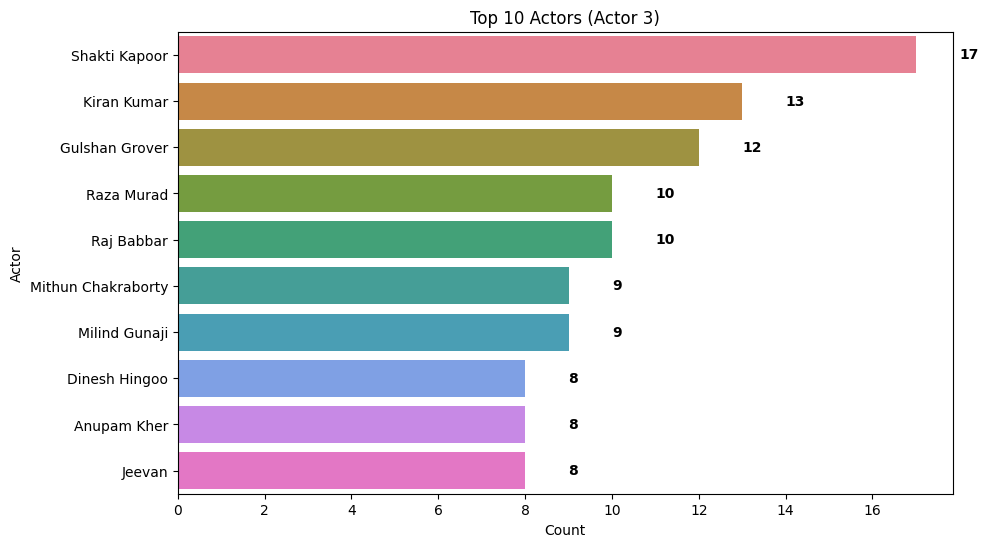

In [31]:
# Assuming df is your DataFrame and 'Actor 1' is a column in the DataFrame
top_actors_1 = df['Actor 3'].value_counts().nlargest(10)

# Define a color palette with different colors
colors = sns.color_palette('husl', len(top_actors_1))

# Visualize the top 10 actors from the 'Actor 1' column with different colors for each bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_actors_1.values, y=top_actors_1.index, palette=colors)

# Display exact counts on top of each bar
for i, v in enumerate(top_actors_1.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Actors (Actor 3)')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

# DATA MODELING

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3764 entries, 0 to 15489
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      3764 non-null   object 
 1   Year      3764 non-null   int32  
 2   Duration  3764 non-null   int32  
 3   Genre     3764 non-null   object 
 4   Rating    3764 non-null   float64
 5   Votes     3764 non-null   float64
 6   Director  3764 non-null   object 
 7   Actor 1   3764 non-null   object 
 8   Actor 2   3764 non-null   object 
 9   Actor 3   3764 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 294.1+ KB


#### CALCULATE THE MEAN RATING FOR EACH GENRE

In [33]:
# Calculate the mean rating for each genre
genre_mean_rating = df.groupby('Genre')['Rating'].mean().reset_index()

In [34]:
# First, we need to create a mapping from the 'Genre' to its mean rating
mean_rating_map = genre_mean_rating.set_index('Genre')['Rating'].to_dict()

# Now we apply the mapping to the 'Genre' column to create a new 'Genre_Mean_Rating' column
# We use the original 'Genre' column to map because 'Genre_Code' is just numerical representation
# and does not contain the actual genre names

# Apply the mapping
df['Genre_Mean_Rating'] = df['Genre'].map(mean_rating_map)

In [35]:
# Create mapping for Actor 1, 2, and 3 to their mean ratings
actor1_mean_rating_map = df.groupby('Actor 1')['Rating'].mean().to_dict()
actor2_mean_rating_map = df.groupby('Actor 2')['Rating'].mean().to_dict()
actor3_mean_rating_map = df.groupby('Actor 3')['Rating'].mean().to_dict()
director_mean_rating_map=df.groupby('Director')['Rating'].mean().to_dict()

# Apply the mapping to create new columns for mean ratings of Actor 1, 2, and 3
# We use the original 'Actor 1', 'Actor 2', and 'Actor 3' columns to map because 'Actor_Code' is just numerical representation
# and does not contain the actual actor names

df['Actor1_Mean_Rating'] = df['Actor 1'].map(actor1_mean_rating_map)
df['Actor2_Mean_Rating'] = df['Actor 2'].map(actor2_mean_rating_map)
df['Actor3_Mean_Rating'] = df['Actor 3'].map(actor3_mean_rating_map)
df['Director_Mean_Rating'] = df['Director'].map(director_mean_rating_map)

# Display the head of the updated dataframe to confirm the changes
# print(df.head())

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3764 entries, 0 to 15489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  3764 non-null   object 
 1   Year                  3764 non-null   int32  
 2   Duration              3764 non-null   int32  
 3   Genre                 3764 non-null   object 
 4   Rating                3764 non-null   float64
 5   Votes                 3764 non-null   float64
 6   Director              3764 non-null   object 
 7   Actor 1               3764 non-null   object 
 8   Actor 2               3764 non-null   object 
 9   Actor 3               3764 non-null   object 
 10  Genre_Mean_Rating     3764 non-null   float64
 11  Actor1_Mean_Rating    3764 non-null   float64
 12  Actor2_Mean_Rating    3764 non-null   float64
 13  Actor3_Mean_Rating    3764 non-null   float64
 14  Director_Mean_Rating  3764 non-null   float64
dtypes: float64(7), int32(2), 

In [37]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Genre_Mean_Rating',
       'Actor1_Mean_Rating', 'Actor2_Mean_Rating', 'Actor3_Mean_Rating',
       'Director_Mean_Rating'],
      dtype='object')

In [38]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'Genre_Mean_Rating', 'Actor1_Mean_Rating', etc. with your actual column names
columns_to_convert = ['Rating','Votes','Genre_Mean_Rating', 'Actor1_Mean_Rating', 'Actor2_Mean_Rating', 'Actor3_Mean_Rating', 'Director_Mean_Rating']

# Convert selected columns from float to integer
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Display the DataFrame after conversion
# print(df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3764 entries, 0 to 15489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  3764 non-null   object
 1   Year                  3764 non-null   int32 
 2   Duration              3764 non-null   int32 
 3   Genre                 3764 non-null   object
 4   Rating                3764 non-null   int32 
 5   Votes                 3764 non-null   int32 
 6   Director              3764 non-null   object
 7   Actor 1               3764 non-null   object
 8   Actor 2               3764 non-null   object
 9   Actor 3               3764 non-null   object
 10  Genre_Mean_Rating     3764 non-null   int32 
 11  Actor1_Mean_Rating    3764 non-null   int32 
 12  Actor2_Mean_Rating    3764 non-null   int32 
 13  Actor3_Mean_Rating    3764 non-null   int32 
 14  Director_Mean_Rating  3764 non-null   int32 
dtypes: int32(9), object(6)
memory usage: 338.2

In [40]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Genre_Mean_Rating',
       'Actor1_Mean_Rating', 'Actor2_Mean_Rating', 'Actor3_Mean_Rating',
       'Director_Mean_Rating'],
      dtype='object')

### USING LINEAR REGRESSION

In [41]:
# Features2 (X) and target variable (y)=0.14 & 0.90
X = df[['Actor2_Mean_Rating','Director_Mean_Rating','Actor3_Mean_Rating']]
y = df['Rating']

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Initialize the Linear Regression model
lr = LinearRegression()

In [44]:
# Initialize the Linear Regression model
lr = LinearRegression()

In [45]:
# Train the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [47]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [48]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
# Display the model's performance metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.14
R-squared: 0.90


### CALCULATING MEAN ABSOLUTE ERROR

In [50]:
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Print the result
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.2464415720413528


### CHECKING RESIDUALS (ACTUAL VALUES-PREDICTED VALUES)

In [51]:
residuals=y_test-y_pred
print(residuals)

4665    -0.299896
11582    0.052326
342     -0.085461
12301   -0.085461
6591     0.520292
           ...   
2662     0.052326
11220    0.266761
9383     0.369924
1406    -0.085461
11594   -0.299896
Name: Rating, Length: 753, dtype: float64


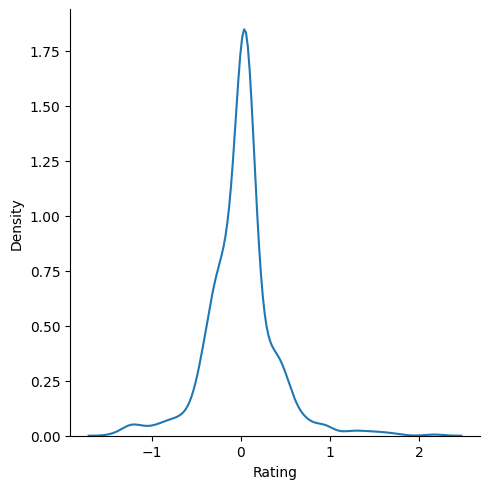

In [52]:
#Plot this residuals
sns.displot(residuals,kind='kde')

In [53]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)

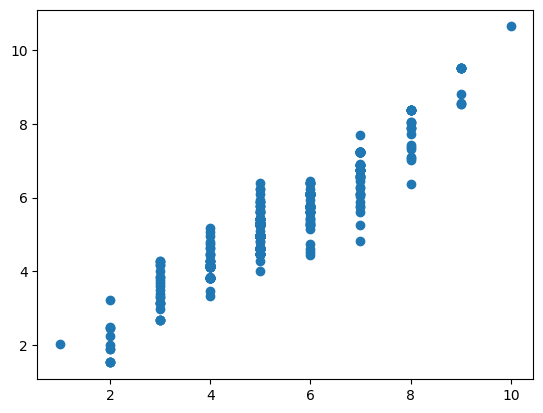

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              42.79
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                    4.50e-27
Time:                        14:50:36   Log-Likelihood:                         -9240.5
No. Observations:                3011   AIC:                                  1.849e+04
Df Residuals:                    3008   BIC:                                  1.851e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3578      0.176      2.031      0.042       0.012       0.703
x2             0.4834      0.174      2.776      0.006       0.142       0.825
x3             0.3175      0.167      1.907      0.057      -0.009       0.644
==============================================================================
Omnibus:                      374.819   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3509.104
Skew:                          -0.218   Prob(JB):                         0.00
Kurtosis:                       8.271   Cond. No.                         3.63
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### FINDING COEFFICIENT OR SLOPE 

In [58]:
regression=LinearRegression(n_jobs=-1)

In [59]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [60]:
print('Coefficient or splope: ',regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficient or splope:  [0.35779379 0.48336645 0.31751009]
Intercept:  5.192294918631684


### PRINTING MODEL SUMMARY...

In [61]:
## OLS Linear Regression
import statsmodels.api as sm

In [62]:
model=sm.OLS(y_train,X_train).fit()

In [63]:
prediction=model.predict(X_test)
print(prediction)

4665     6.151145
11582    5.793352
342      6.952022
12301    6.952022
6591     5.309985
           ...   
2662     5.793352
11220    6.594228
9383     5.475842
1406     6.952022
11594    6.151145
Length: 753, dtype: float64


In [64]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              42.79
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                    4.50e-27
Time:                        14:50:36   Log-Likelihood:                         -9240.5
No. Observations:                3011   AIC:                                  1.849e+04
Df Residuals:                    3008   BIC:                                  1.851e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### # Visualize best fit line

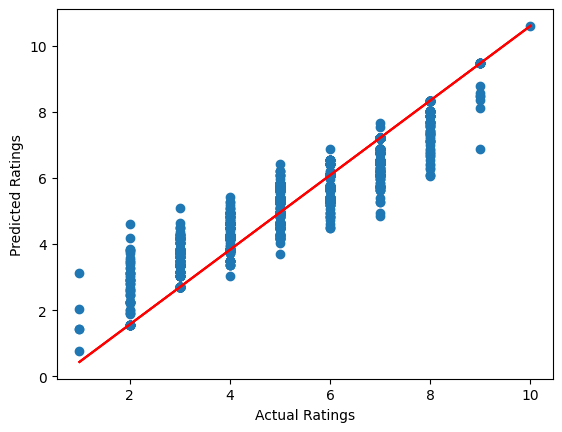

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Features (X)
X = df[['Actor2_Mean_Rating', 'Director_Mean_Rating', 'Actor3_Mean_Rating']]  

# Target variable (y) 
y = df['Rating']  

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Generate X data to plot prediction line 
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 3)

# Make predictions
y_pred = model.predict(X_line)

# Visualize best fit line
fig, ax = plt.subplots()
ax.scatter(y, model.predict(X))
ax.plot(X_line, y_pred, c='r')

ax.set_xlabel('Actual Ratings')
ax.set_ylabel('Predicted Ratings')

plt.show()

### Get residuals 

In [66]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get residuals  
res = y - model.predict(X)

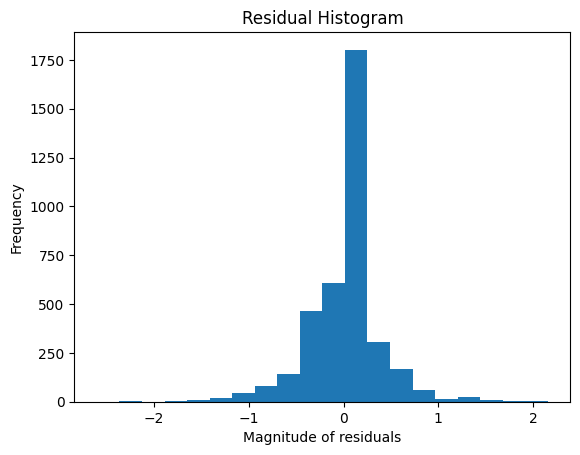

In [67]:
# 1. Residual histogram
plt.hist(res, bins=20)
plt.title("Residual Histogram")
plt.xlabel("Magnitude of residuals")
plt.ylabel("Frequency")
plt.show()

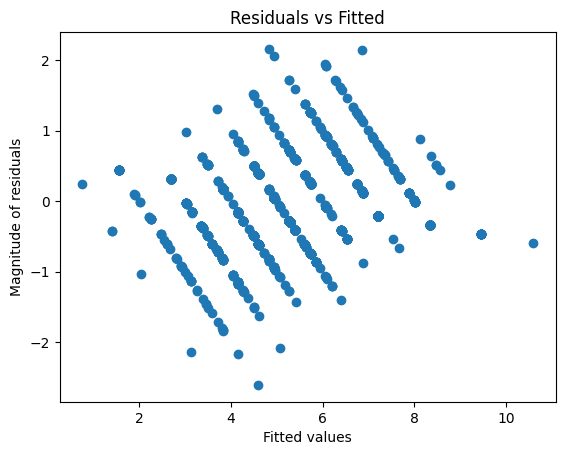

In [68]:
# 2. Residuals vs Fitted plot  
plt.scatter(model.predict(X), res)
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Magnitude of residuals")
plt.show()

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume we have a model fit on X and y data

# Get predictions on the training data 
y_pred = model.predict(X)

# Calculate R-squared 
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Calculate MSE
mse = mean_squared_error(y, y_pred) 
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)
print("MAE:", mae)

R-squared: 0.8869686913594811
MSE: 0.14988652085966758
RMSE: 0.3871518059620381
MAE: 0.24804730709440598


## These metrics collectively suggest that the regression model has a good predictive performance, with high R² and relatively low error metrics (MSE, RMSE, and MAE).

## Thank You...